# Atelier : Régression Logistique avec Python

## Exercice 1 : Comprendre la Régression Logistique

La fonction logistique est définie par la formule suivante :

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

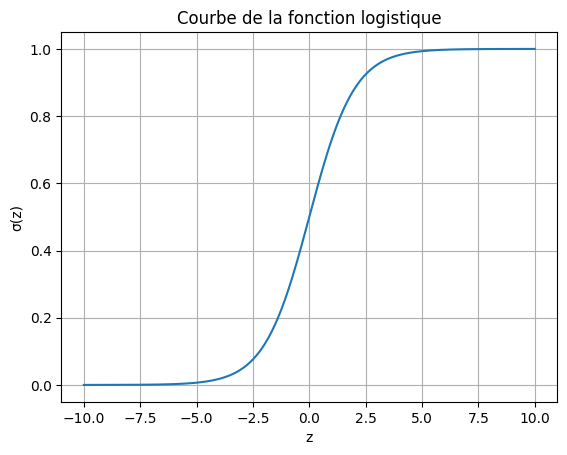

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Définir la fonction sigmoïde
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Plage de valeurs de z entre -10 et 10
z = np.linspace(-10, 10, 400)

# Calcul de σ(z)
sigma = sigmoid(z)

# Tracer la fonction sigmoïde
# Tracer la courbe
plt.plot(z, sigma)
plt.title("Courbe de la fonction logistique")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()




### Questions :

1. **Quelle est la plage des valeurs que peut prendre la fonction sigmoid ?**

   La fonction sigmoïde (ou logistique) prend des valeurs comprises entre 0 et 1. En d'autres termes, pour toute valeur d'entrée  `z` , la fonction  `σ(z)` retourne une valeur dans l'intervalle :

   $$
   0 < \sigma(z) < 1
   $$

   Cela signifie que la fonction peut prendre toutes les valeurs dans cet intervalle, mais jamais exactement 0 ou 1. À mesure que \( z \) devient très grand ou très petit, la fonction approche asymptotiquement 1 et 0, respectivement.

2. **Pourquoi cette fonction est-elle utile pour modéliser une probabilité ?**

   La fonction sigmoïde est particulièrement utile pour modéliser une probabilité car :
   - **Bornée entre 0 et 1** : Les probabilités sont toujours dans cet intervalle, et la fonction sigmoïde mappe toute entrée réelle à une valeur comprise entre 0 et 1, ce qui en fait une fonction idéale pour représenter des probabilités.
   - **Interprétation intuitive** : La sortie de la fonction sigmoïde peut être interprétée comme la probabilité d'un événement. Par exemple, dans le contexte de la régression logistique, on peut utiliser la fonction sigmoïde pour prédire la probabilité qu'un événement appartienne à une certaine classe (par exemple, "oui" ou "non").
   - **Transformation monotone** : La fonction sigmoïde est monotone, ce qui signifie qu'elle préserve l'ordre. Cela permet de transformer des scores continus en probabilités tout en maintenant la structure des données d'entrée.


## Exercice 2 : Application à un Jeu de Données Synthétique

In [30]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Générer un jeu de données synthétique
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42)

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Appliquer la régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.87



### Questions :

1. **Limites de la régression logistique avec deux classes** :
   - Hypothèse de linéarité (ne fonctionne bien que si les classes sont séparables par une frontière linéaire),
   - Sensibilité aux valeurs extrêmes et au bruit,
   - Risque de sur-apprentissage avec une séparation parfaite des classes.

2. **Comment améliorer la précision** :
   - Appliquer des transformations non linéaires aux données,
   - Utiliser la régularisation (L1 ou L2),
   - Gérer les classes déséquilibrées avec des techniques comme l'oversampling ou l'undersampling,
   - Essayer des modèles plus complexes comme les arbres de décision ou SVM,
   - Améliorer la qualité des données d'entrée.


## Exercice 3 : Visualisation de la Frontière de Décision



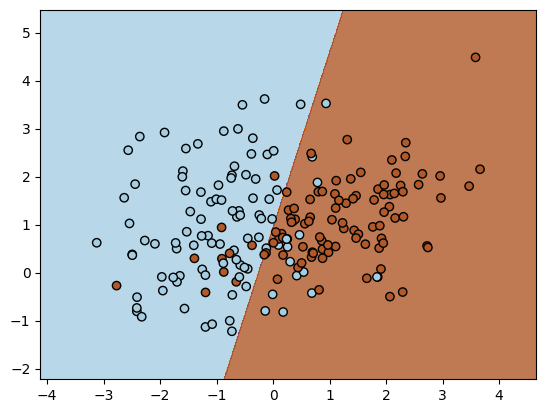

In [31]:
import matplotlib.pyplot as plt

# Fonction pour tracer la frontière de décision
def plot_decision_boundary(model, X, y):
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.show()

# Tracer la frontière de décision
plot_decision_boundary(model, X, y)


### Questions :

1. **La frontière de décision est-elle linéaire ? Pourquoi ?**
   - Oui, la frontière de décision est linéaire parce que la régression logistique cherche à séparer les classes à l'aide d'une combinaison linéaire des caractéristiques.

2. **Que se passe-t-il si les données sont non linéairement séparables ?**
   - Si les données ne peuvent pas être séparées de manière linéaire, la régression logistique aura des performances limitées. Dans ce cas, il faut envisager d'autres approches comme l'utilisation de modèles non linéaires.


## Exercice 4 : Interprétation des Coefficients

In [32]:
# Afficher les coefficients du modèle
print(f"Coefficients: {model.coef_}")

# Afficher l'intercept
print(f"Intercept: {model.intercept_}")

# Interprétation des coefficients :
for i, coef in enumerate(model.coef_[0]):
    print(f"l'importance de la caractéristique {i} est de {coef}")


Coefficients: [[ 1.80075398 -0.49370202]]
Intercept: [0.46697811]
l'importance de la caractéristique 0 est de 1.8007539794625331
l'importance de la caractéristique 1 est de -0.4937020235578221


### 1. **Comment interpréter les coefficients d'une régression logistique ?**
Les coefficients dans une régression logistique représentent l'impact de chaque variable indépendante sur la **log des cotes** de l'événement d'intérêt (par exemple, \( y = 1 \)).

- Un **coefficient positif** indique que l'augmentation de la variable augmente la probabilité de \( y = 1 \).
- Un **coefficient négatif** indique que l'augmentation de la variable diminue la probabilité de \( y = 1 \).

Dans votre cas :
- **\( \beta_1 = 1.801 \)** : Chaque unité d'augmentation de \( X_1 \) **multiplie les cotes** de \( y = 1 \) par environ **6.05**, rendant \( y = 1 \) plus probable.
- **\( \beta_2 = -0.494 \)** : Chaque unité d'augmentation de \( X_2 \) **multiplie les cotes** de \( y = 1 \) par environ **0.61**, rendant \( y = 1 \) moins probable.

### 2. **Que représente l’intercept ?**
L'intercept (\( \beta_0 \)) représente la log des cotes de \( y = 1 \) lorsque toutes les variables indépendantes sont égales à zéro. C'est la probabilité de \( y = 1 \) sans l'influence des variables.

Dans votre cas :
- **\( \beta_0 = 0.467 \)** signifie que lorsque \( X_1 = 0 \) et \( X_2 = 0 \), la probabilité de \( y = 1 \) est d'environ **61.5 %**.


## Exercice 5 : Utilisation sur un Jeu de Données Réel (Titanic)


In [35]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Charger les données
data = sns.load_dataset("titanic")
data = data[["age", "fare", "sex", "class", "survived"]].dropna()

# Encodage des variables catégoriques
data["sex"] = data["sex"].map({"male": 0, "female": 1})
data["class"] = data["class"].map({"Third": 0, "Second": 1, "First": 2})

# Séparer les caractéristiques et la cible
X = data[["age", "fare", "sex", "class"]]
y = data["survived"]

# Normalisation des caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Régression logistique
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Précision sur les données réelles : {accuracy_score(y_test, y_pred):.2f}")


Précision sur les données réelles : 0.76


C:\Users\ETUDIANT\AppData\Local\Temp\ipykernel_13360\2435011812.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sex", y="survived", data=data, palette="Set2")
C:\Users\ETUDIANT\AppData\Local\Temp\ipykernel_13360\2435011812.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="survived", y="fare", data=data, palette="Set1")


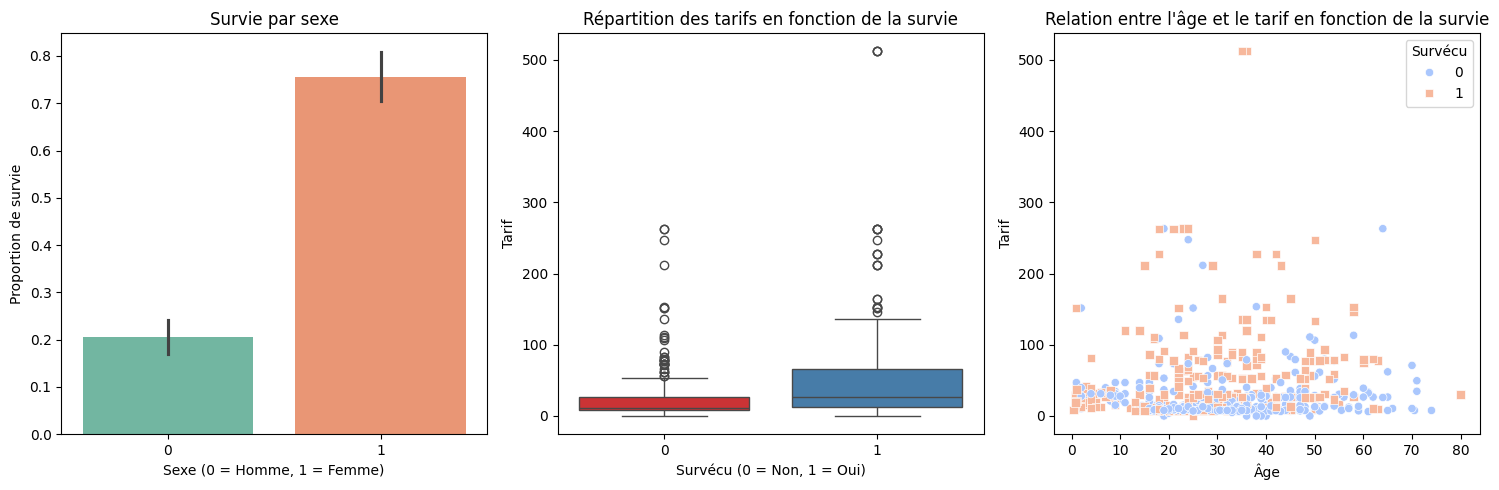

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Bloc pour générer les graphiques

plt.figure(figsize=(15, 5))

# 1. Diagramme en barres de la survie par sexe
plt.subplot(1, 3, 1)
sns.barplot(x="sex", y="survived", data=data, palette="Set2")
plt.title("Survie par sexe")
plt.xlabel("Sexe (0 = Homme, 1 = Femme)")
plt.ylabel("Proportion de survie")

# 2. Boxplot de la survie par tarif
plt.subplot(1, 3, 2)
sns.boxplot(x="survived", y="fare", data=data, palette="Set1")
plt.title("Répartition des tarifs en fonction de la survie")
plt.xlabel("Survécu (0 = Non, 1 = Oui)")
plt.ylabel("Tarif")

# 3. Scatter plot entre l'âge et le tarif en fonction de la survie
plt.subplot(1, 3, 3)
sns.scatterplot(x="age", y="fare", hue="survived", data=data, palette="coolwarm", style="survived", markers=["o", "s"])
plt.title("Relation entre l'âge et le tarif en fonction de la survie")
plt.xlabel("Âge")
plt.ylabel("Tarif")
plt.legend(title="Survécu", loc="best")

# Afficher tous les graphiques
plt.tight_layout()
plt.show()

### 1. **Quels facteurs influencent le plus la survie ?**
Les facteurs les plus influents sur la survie sont :
- **Sexe** : Les femmes ont une probabilité plus élevée de survie.
- **Classe** : Les passagers des classes supérieures (Première, Deuxième) ont plus de chances de survie.
- **Tarif** : Un tarif plus élevé augmente la probabilité de survie.
- **Âge** : Les passagers plus âgés ont moins de chances de survie.

### 2. **Comment améliorer les performances en ajustant les hyperparamètres ?**
- **Régularisation (C)** : Ajuster le paramètre **C** permet de réguler la complexité du modèle.
- **Validation croisée** : Utiliser la validation croisée pour tester la robustesse du modèle sur plusieurs sous-ensembles de données.
- **Optimisation des hyperparamètres** : Utiliser des techniques comme **GridSearchCV** pour trouver les meilleurs paramètres du modèle.
